In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d=pd.read_csv("Mall_Customers.csv")
d=d.rename(columns = {'Annual Income (k$)' : 'Annual_Income','Spending Score (1-100)' : 'Spending_Score'})
d.head()

CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [3]:
d.shape

(200, 5)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

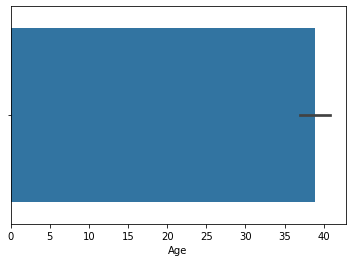

In [5]:
sns.barplot(d.Age)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

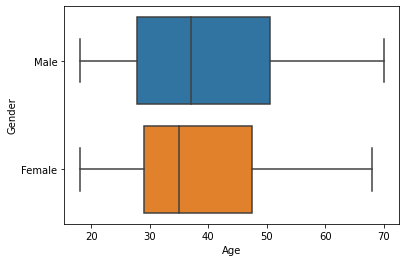

In [6]:
sns.boxplot(y=d.Gender,x=d.Age)

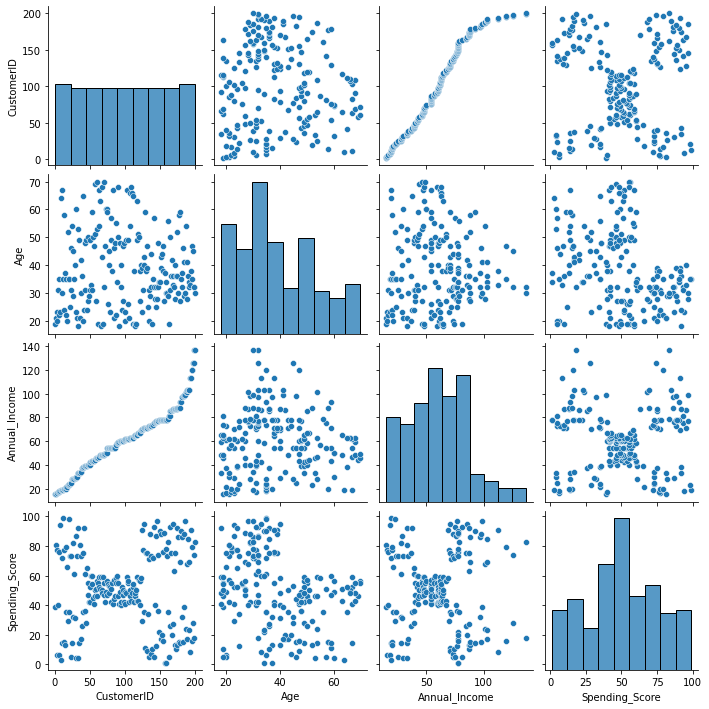

In [7]:
sns.pairplot(d)

In [8]:
d.describe(include='all')

CustomerID  Gender         Age  Annual_Income  Spending_Score
count   200.000000     200  200.000000     200.000000      200.000000
unique         NaN       2         NaN            NaN             NaN
top            NaN  Female         NaN            NaN             NaN
freq           NaN     112         NaN            NaN             NaN
mean    100.500000     NaN   38.850000      60.560000       50.200000
std      57.879185     NaN   13.969007      26.264721       25.823522
min       1.000000     NaN   18.000000      15.000000        1.000000
25%      50.750000     NaN   28.750000      41.500000       34.750000
50%     100.500000     NaN   36.000000      61.500000       50.000000
75%     150.250000     NaN   49.000000      78.000000       73.000000
max     200.000000     NaN   70.000000     137.000000       99.000000

In [9]:
d.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

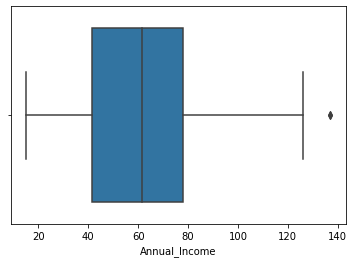

In [10]:
sns.boxplot(d['Annual_Income'])

In [11]:
q1 = d.Annual_Income.quantile(0.25)
q2 = d.Annual_Income.quantile(0.75)
IQR = q2 - q1
print(IQR)

36.5


In [12]:
d=d[~((d.Annual_Income<(q1-1.5*IQR))|(d.Annual_Income>(q2+1.5*IQR)))]
d

CustomerID  Gender  Age  Annual_Income  Spending_Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
193         194  Female   38            113              91
194         195  Female   47            120              16
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74

[198 rows x 5 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

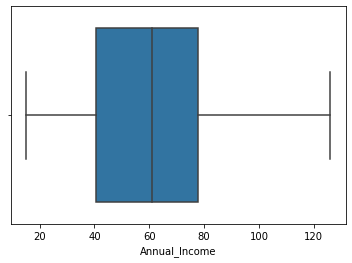

In [13]:
sns.boxplot(d['Annual_Income'])

In [ ]:
"Checking for Categorical columns and perform Encoding"

In [15]:
d.head()

CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
d.Gender = le.fit_transform(d.Gender)

d.head()

C:\Users\KeshavG\AppData\Local\Temp\ipykernel_15040\674852927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Gender = le.fit_transform(d.Gender)


CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1       1   19             15              39
1           2       1   21             15              81
2           3       0   20             16               6
3           4       0   23             16              77
4           5       0   31             17              40

In [19]:
"Scaling the data"

'Scaling the data'

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(d)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00507614, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01015228, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01522843, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.02030457, 0.        , 0.25      , 0.01801802, 0.39795918]])

In [21]:
"Performing any of the clustering algorithms"

'Performing any of the clustering algorithms'

In [22]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([5, 5, 0, 0, 0, 0, 6, 0, 7, 0, 7, 0, 6, 0, 5, 5, 0, 5, 7, 0, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 0, 7, 0, 7, 5, 6, 0, 6, 0, 6, 0, 6, 5, 7, 0,
       6, 0, 6, 0, 0, 0, 6, 5, 0, 7, 6, 7, 6, 7, 0, 7, 7, 5, 6, 6, 7, 5,
       6, 6, 5, 0, 7, 6, 6, 6, 7, 5, 6, 7, 0, 6, 7, 5, 7, 6, 0, 7, 6, 0,
       0, 6, 6, 5, 7, 6, 0, 5, 6, 0, 7, 5, 0, 6, 7, 5, 7, 0, 6, 7, 7, 7,
       7, 0, 3, 5, 0, 0, 6, 6, 6, 6, 4, 3, 2, 4, 3, 2, 1, 4, 1, 4, 1, 4,
       3, 2, 1, 2, 3, 4, 1, 2, 3, 4, 3, 2, 1, 4, 1, 2, 3, 4, 1, 4, 3, 2,
       3, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 4, 1, 4, 1, 4, 3, 2,
       1, 4, 1, 4, 3, 2, 1, 2, 3, 4, 3, 4, 3, 2, 3, 2, 1, 2, 3, 2, 3, 4])

In [23]:
data1 = pd.DataFrame(data_scaled, columns = d.columns)
data1.drop('CustomerID',axis=1,inplace=True)
data1.head()

Gender       Age  Annual_Income  Spending_Score
0     1.0  0.019231       0.000000        0.387755
1     1.0  0.057692       0.000000        0.816327
2     0.0  0.038462       0.009009        0.051020
3     0.0  0.096154       0.009009        0.775510
4     0.0  0.250000       0.018018        0.397959

In [24]:
data1['kclus']  = pd.Series(res)
data1.head()

Gender       Age  Annual_Income  Spending_Score  kclus
0     1.0  0.019231       0.000000        0.387755      5
1     1.0  0.057692       0.000000        0.816327      5
2     0.0  0.038462       0.009009        0.051020      0
3     0.0  0.096154       0.009009        0.775510      0
4     0.0  0.250000       0.018018        0.397959      0

In [25]:
data1['kclus'].unique()

array([5, 0, 6, 7, 3, 4, 2, 1])

In [26]:
data1['kclus'].value_counts()

6    36
0    34
7    26
5    23
2    22
3    20
1    19
4    18
Name: kclus, dtype: int64

In [27]:
"Splitting dataset into train and test data"

'Splitting dataset into train and test data'

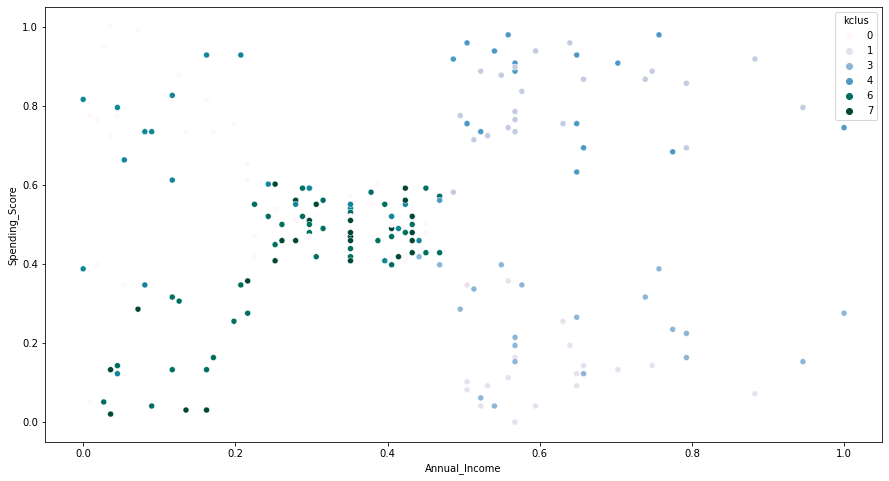

In [28]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual_Income'],
                y=data1['Spending_Score'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [29]:
ind = data1.iloc[:,0:4]
ind.head()

Gender       Age  Annual_Income  Spending_Score
0     1.0  0.019231       0.000000        0.387755
1     1.0  0.057692       0.000000        0.816327
2     0.0  0.038462       0.009009        0.051020
3     0.0  0.096154       0.009009        0.775510
4     0.0  0.250000       0.018018        0.397959

In [30]:
dep = data1.iloc[:,4:]
dep.head()

kclus
0      5
1      5
2      0
3      0
4      0

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

Gender       Age  Annual_Income  Spending_Score
124     0.0  0.096154       0.495495        0.285714
97      0.0  0.173077       0.405405        0.500000
42      1.0  0.576923       0.216216        0.357143
17      1.0  0.038462       0.054054        0.663265
5       0.0  0.076923       0.018018        0.765306

In [32]:
x_test.head()

Gender       Age  Annual_Income  Spending_Score
175     0.0  0.230769       0.657658        0.867347
40      0.0  0.903846       0.207207        0.346939
34      0.0  0.596154       0.162162        0.132653
90      0.0  0.961538       0.396396        0.551020
145     1.0  0.192308       0.558559        0.979592

In [33]:
y_train.head()

kclus
124      3
97       0
42       7
17       5
5        0

In [34]:
y_test.head()

kclus
175      2
40       6
34       6
90       6
145      4

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[1.95607883],
       [6.1003241 ],
       [4.2268214 ],
       [6.19632985],
       [3.59948696]])

In [38]:
"Measuring the performance using metrics"

'Measuring the performance using metrics'

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.554960484338881
The Root mean squared error is:  1.8854602844766795
The Mean absolute error is:  1.4605015236480232
The accuracy is:  0.42996491276023463
